In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import re

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb

from scipy.stats import f_oneway, f

import statsmodels.api as sm
from statsmodels.formula.api import ols 

import warnings
warnings.simplefilter('ignore')

import seaborn as sns
import seaborn as sb

from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('C:/Users/doris/Documents/data_analytics/Final_Project/NBA_Diff/games.csv')

In [3]:
data.head(5)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,...,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,...,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0
3,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,...,33.0,55.0,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1
4,2022-03-12,22101009,Final,1610612743,1610612761,2021,1610612743,115.0,0.551,0.750,...,32.0,39.0,1610612761,127.0,0.471,0.760,0.387,28.0,50.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25796 entries, 0 to 25795
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     25796 non-null  object 
 1   GAME_ID           25796 non-null  int64  
 2   GAME_STATUS_TEXT  25796 non-null  object 
 3   HOME_TEAM_ID      25796 non-null  int64  
 4   VISITOR_TEAM_ID   25796 non-null  int64  
 5   SEASON            25796 non-null  int64  
 6   TEAM_ID_home      25796 non-null  int64  
 7   PTS_home          25697 non-null  float64
 8   FG_PCT_home       25697 non-null  float64
 9   FT_PCT_home       25697 non-null  float64
 10  FG3_PCT_home      25697 non-null  float64
 11  AST_home          25697 non-null  float64
 12  REB_home          25697 non-null  float64
 13  TEAM_ID_away      25796 non-null  int64  
 14  PTS_away          25697 non-null  float64
 15  FG_PCT_away       25697 non-null  float64
 16  FT_PCT_away       25697 non-null  float6

In [5]:
data['GAME_DATE_EST'] = data['GAME_DATE_EST'].astype('datetime64[ns]')

In [53]:
data['year'] = data['GAME_DATE_EST'].dt.year

In [7]:
data['pts_totals'] = data['PTS_away'] + data['PTS_home']

In [8]:
data['ast_totals'] = data['AST_away'] + data['AST_home']

In [9]:
data['fg_totals'] = data['FG_PCT_away'] + data['FG_PCT_home']

In [10]:
data['rb_totals'] = data['REB_away'] + data['REB_home']

In [11]:
data['fg3_totals'] = data['FG3_PCT_away'] + data['FG3_PCT_home']

In [12]:
data['ft_totals'] = data['FT_PCT_away'] + data['FT_PCT_home']

In [62]:
data.rename(columns={'HOME_TEAM_WINS': 'Equipos_Local_y_Visitante'}, inplace=True)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 0 to 25795
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   GAME_DATE_EST              25697 non-null  datetime64[ns]
 1   GAME_ID                    25697 non-null  int64         
 2   GAME_STATUS_TEXT           25697 non-null  object        
 3   HOME_TEAM_ID               25697 non-null  int64         
 4   VISITOR_TEAM_ID            25697 non-null  int64         
 5   SEASON                     25697 non-null  int64         
 6   TEAM_ID_home               25697 non-null  int64         
 7   PTS_home                   25697 non-null  float64       
 8   FG_PCT_home                25697 non-null  float64       
 9   FT_PCT_home                25697 non-null  float64       
 10  FG3_PCT_home               25697 non-null  float64       
 11  AST_home                   25697 non-null  float64       
 12  REB_

In [13]:
#Trabajamos con valores nulos
NA = data.isna().sum()
NA[NA > 0]

PTS_home        99
FG_PCT_home     99
FT_PCT_home     99
FG3_PCT_home    99
AST_home        99
REB_home        99
PTS_away        99
FG_PCT_away     99
FT_PCT_away     99
FG3_PCT_away    99
AST_away        99
REB_away        99
pts_totals      99
ast_totals      99
fg_totals       99
rb_totals       99
fg3_totals      99
ft_totals       99
dtype: int64

In [14]:
#eliminamos los valores nulos para que el dataset sea homogeneo
data = data.dropna(axis = 0, how ='any')

In [15]:
data.isnull().sum().max() 

0

In [16]:
data.shape #Cantidad de filas y columnas

(25697, 28)

In [17]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GAME_ID,25697.0,2.173597e+07,5.460853e+06,1.030000e+07,2.060117e+07,2.120045e+07,2.170072e+07,5.200021e+07
HOME_TEAM_ID,25697.0,1.610613e+09,8.641473e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
VISITOR_TEAM_ID,25697.0,1.610613e+09,8.655103e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
SEASON,25697.0,2.011832e+03,5.380624e+00,2.003000e+03,2.007000e+03,2.012000e+03,2.016000e+03,2.021000e+03
TEAM_ID_home,25697.0,1.610613e+09,8.641473e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
PTS_home,25697.0,1.031060e+02,1.317473e+01,3.600000e+01,9.400000e+01,1.030000e+02,1.120000e+02,1.680000e+02
FG_PCT_home,25697.0,4.603128e-01,5.662854e-02,2.500000e-01,4.210000e-01,4.590000e-01,5.000000e-01,6.840000e-01
FT_PCT_home,25697.0,7.597049e-01,1.006920e-01,1.430000e-01,6.960000e-01,7.650000e-01,8.290000e-01,1.000000e+00
FG3_PCT_home,25697.0,3.558964e-01,1.119400e-01,0.000000e+00,2.860000e-01,3.550000e-01,4.290000e-01,1.000000e+00
AST_home,25697.0,2.273678e+01,5.177566e+00,6.000000e+00,1.900000e+01,2.300000e+01,2.600000e+01,5.000000e+01


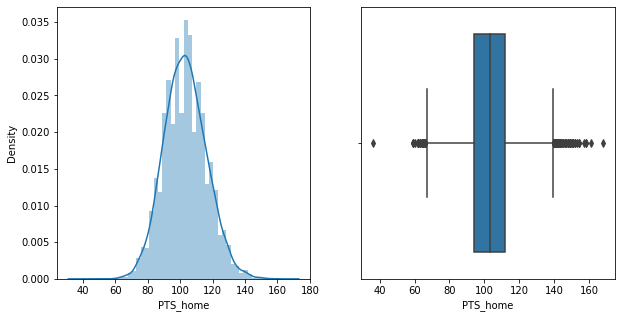

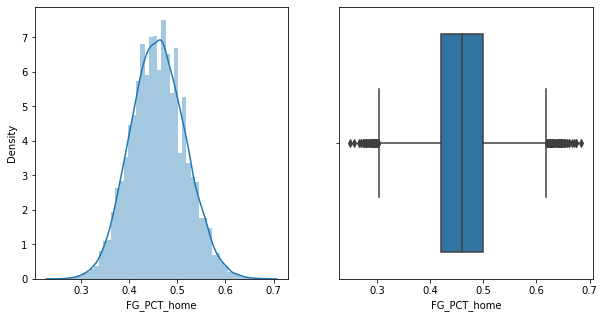

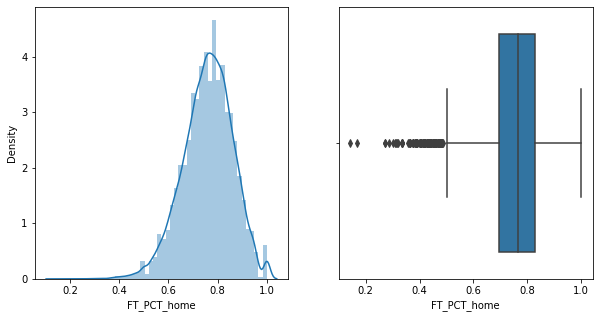

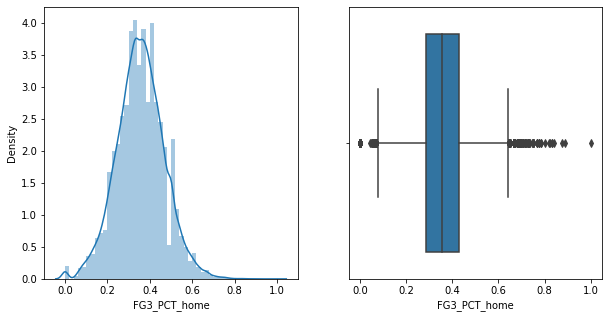

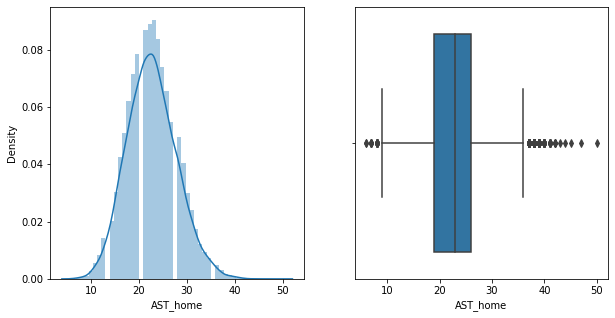

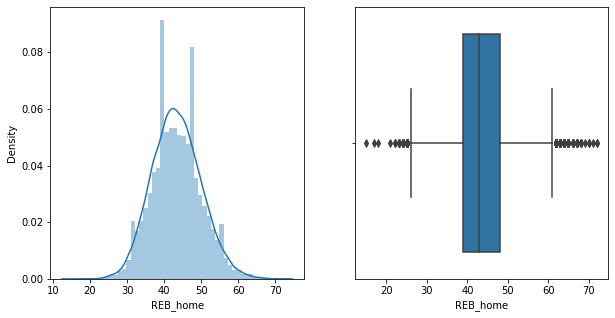

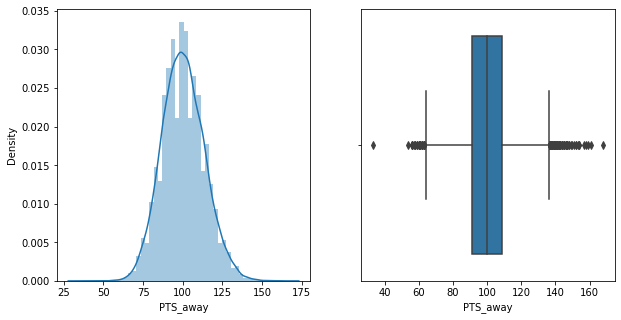

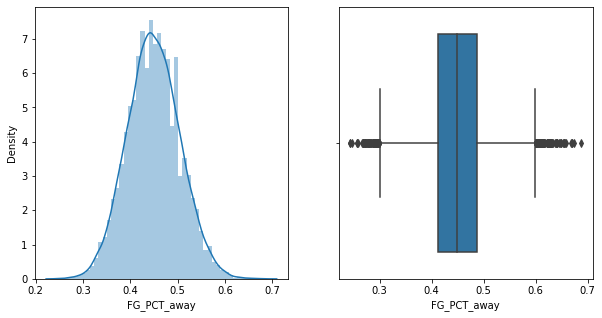

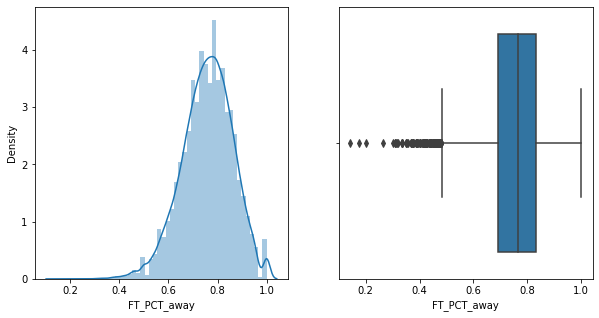

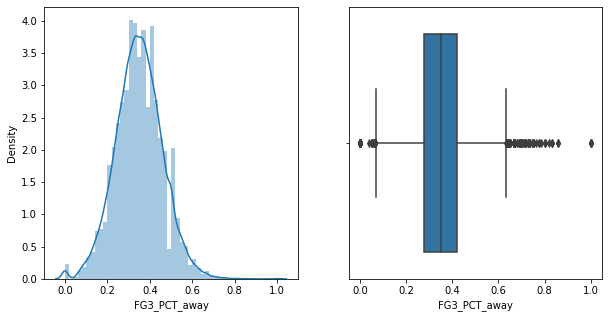

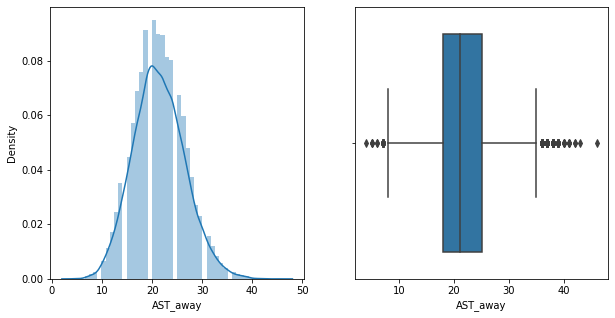

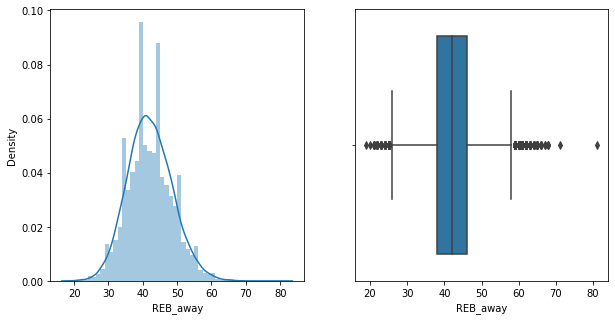

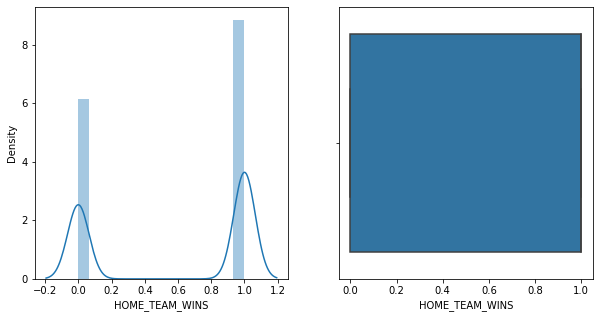

In [18]:
"""El dataset muestra las estadisticas totales y porcentajes de los jugadores por temporada a partir del 1980. Vamos aver el
comportamiento de las distribuciones de las edades, minutos jugados, puntos y algunas mas variables"""

columnas = ['PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'PTS_away', 
            'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS']

for columna in columnas:
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.distplot(data[columna], kde=True, ax=ax[0])
    sns.boxplot(data[columna], orient='h', ax=ax[1]);

In [19]:
"""Nuestra variable objetivo es HOME_TEAM_WINS, el cual representa si el equipo de la casa obtuvo la victoria en 1
o si el equipo visitante se lleva la victoria en 0, es decir, la variable es dummy. En ese sentido mas adelante 
se pretende predecir con modelos de machine learning si gana el equipo de casa o visitante. Mientras tanto vamos a analizar
el comportamiento de las demas variables como son los puntos por juego, debido a que es el factor que implica una victoria"""

'Nuestra variable objetivo es HOME_TEAM_WINS, el cual representa si el equipo de la casa obtuvo la victoria en 1\no si el equipo visitante se lleva la victoria en 0, es decir, la variable es dummy. En ese sentido mas adelante \nse pretende predecir con modelos de machine learning si gana el equipo de casa o visitante. Mientras tanto vamos a analizar\nel comportamiento de las demas variables como son los puntos por juego, debido a que es el factor que implica una victoria'

In [20]:
data.groupby('HOME_TEAM_WINS')['PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home'].mean()

,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home
HOME_TEAM_WINS,,,,,,
0,96.804971,0.430871,0.748512,0.315525,20.850313,41.389869
1,107.489145,0.480793,0.767491,0.383979,24.049027,44.706368


In [21]:
data.groupby('HOME_TEAM_WINS')['PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away'].mean()

,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
HOME_TEAM_WINS,,,,,,
0,106.941093,0.478334,0.771339,0.387780,23.222064,44.070290
1,95.670406,0.429045,0.748860,0.322725,20.139162,40.704256


In [22]:
"""Vamos a tratar las variables en dos bandas, las estadisticas de los equipos visitantes y las estadisticas de los 
equipos de la casa, asi se puede tener mejor claridad de los impactos entre variables"""

'Vamos a tratar las variables en dos bandas, las estadisticas de los equipos visitantes y las estadisticas de los \nequipos de la casa, asi se puede tener mejor claridad de los impactos entre variables'

In [23]:
data_home = data[['PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home']]

In [24]:
corr1 = data_home.corr()
corr1

,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home
PTS_home,1.000000,0.661964,0.184323,0.423277,0.601088,0.163020
FG_PCT_home,0.661964,1.000000,0.018565,0.449595,0.549268,-0.188445
FT_PCT_home,0.184323,0.018565,1.000000,0.028656,0.018711,-0.052373
FG3_PCT_home,0.423277,0.449595,0.028656,1.000000,0.351811,-0.087723
AST_home,0.601088,0.549268,0.018711,0.351811,1.000000,0.066332
REB_home,0.163020,-0.188445,-0.052373,-0.087723,0.066332,1.000000


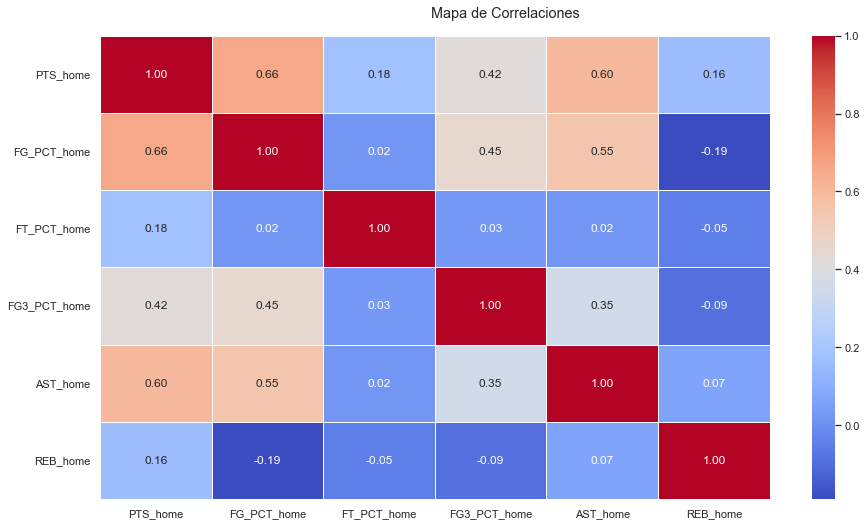

In [25]:
sns.set() #heatmap de las correlaciones con seaborn

fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(round(corr1, 2), annot=True, ax=ax, cmap='coolwarm',
            fmt='.2f', linewidths=0.5)
fig.subplots_adjust(top=0.93)
fig.suptitle('Mapa de Correlaciones');

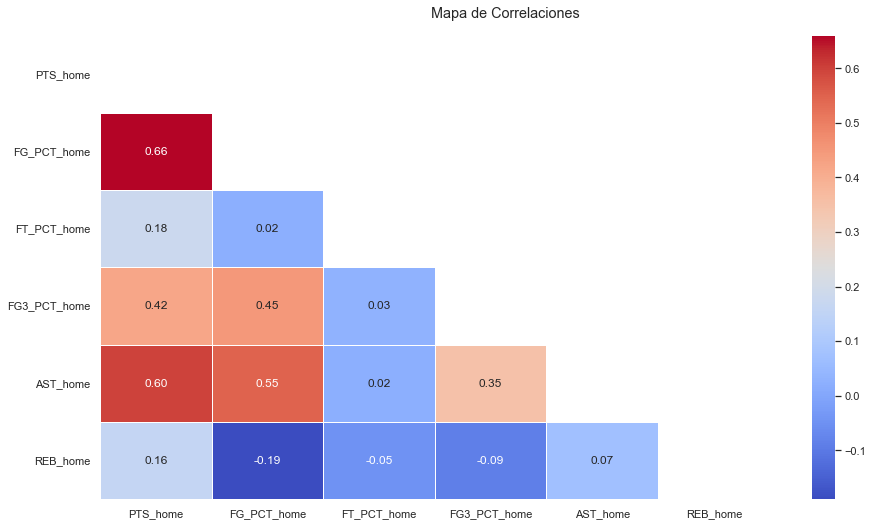

In [26]:
mask = np.zeros_like(corr1)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(15, 8))
    sns.heatmap(round(corr1, 2), annot=True, ax=ax, cmap='coolwarm',
                fmt='.2f', linewidths=0.5, mask=mask)
    fig.subplots_adjust(top=0.93)
    fig.suptitle('Mapa de Correlaciones')

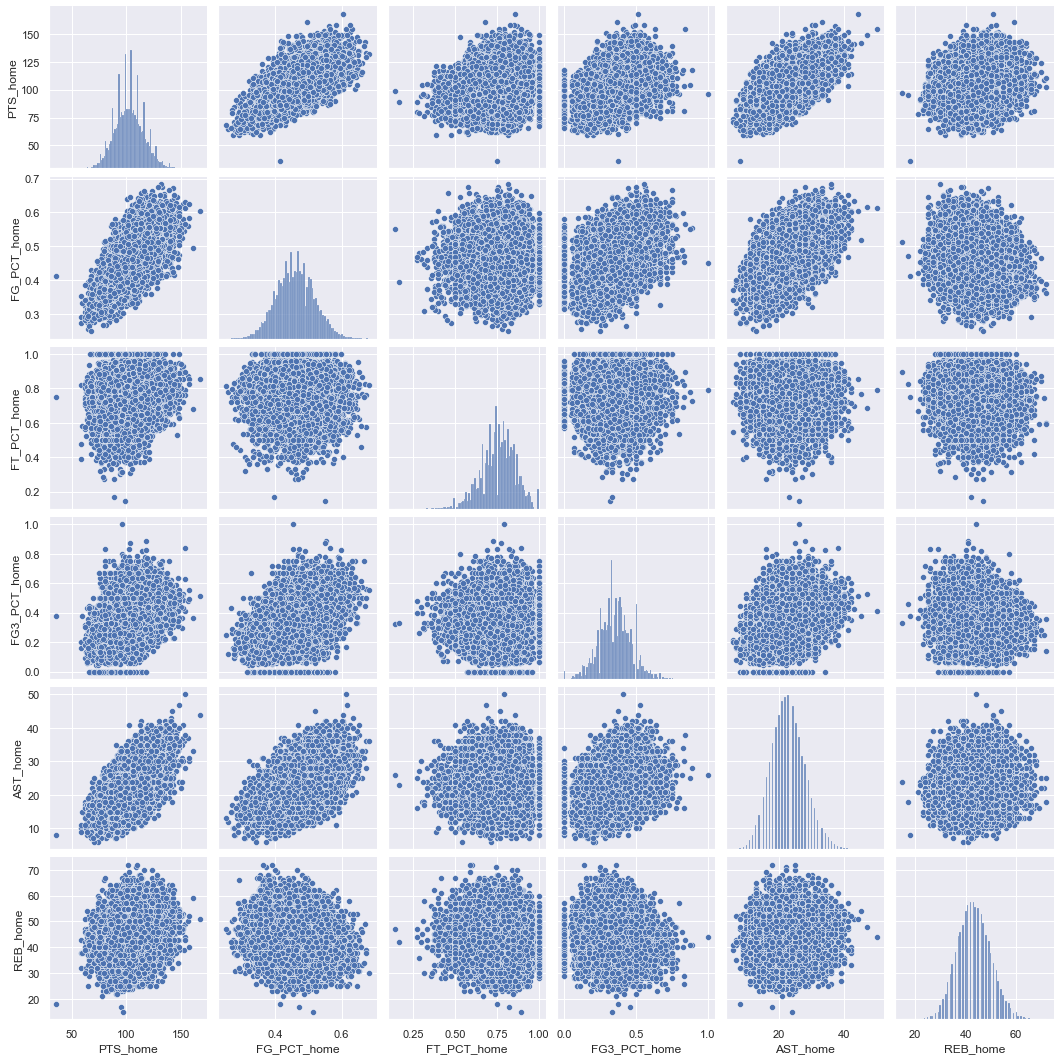

In [27]:
sns.pairplot(data_home);

[Text(0.5, 0, 'Home Team Field Goal 3 Points'),
 Text(0, 0.5, 'Home Team Points')]

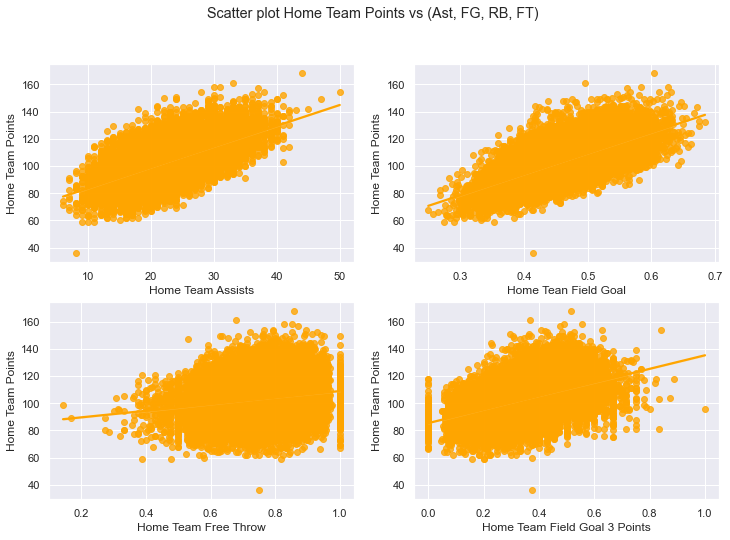

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
 
fig.suptitle('Scatter plot Home Team Points vs (Ast, FG, RB, FT)')
  
sns.regplot(ax=axes[0, 0], data=data, x='AST_home', y='PTS_home', color='orange').set(xlabel='Home Team Assists',
       ylabel='Home Team Points')
sns.regplot(ax=axes[0, 1], data=data, x='FG_PCT_home', y='PTS_home', color='orange').set(xlabel='Home Tean Field Goal',
       ylabel='Home Team Points')
sns.regplot(ax=axes[1, 0], data=data, x='FT_PCT_home', y='PTS_home', color='orange').set(xlabel='Home Team Free Throw',
       ylabel='Home Team Points')
sns.regplot(ax=axes[1, 1], data=data, x='FG3_PCT_home', y='PTS_home', color='orange').set(xlabel='Home Team Field Goal 3 Points',
       ylabel='Home Team Points')


[Text(0.5, 0, 'Home Team Rebound'),
 Text(0, 0.5, 'Home Team Points'),
 Text(0.5, 1.0, 'Points vs Rebounds')]

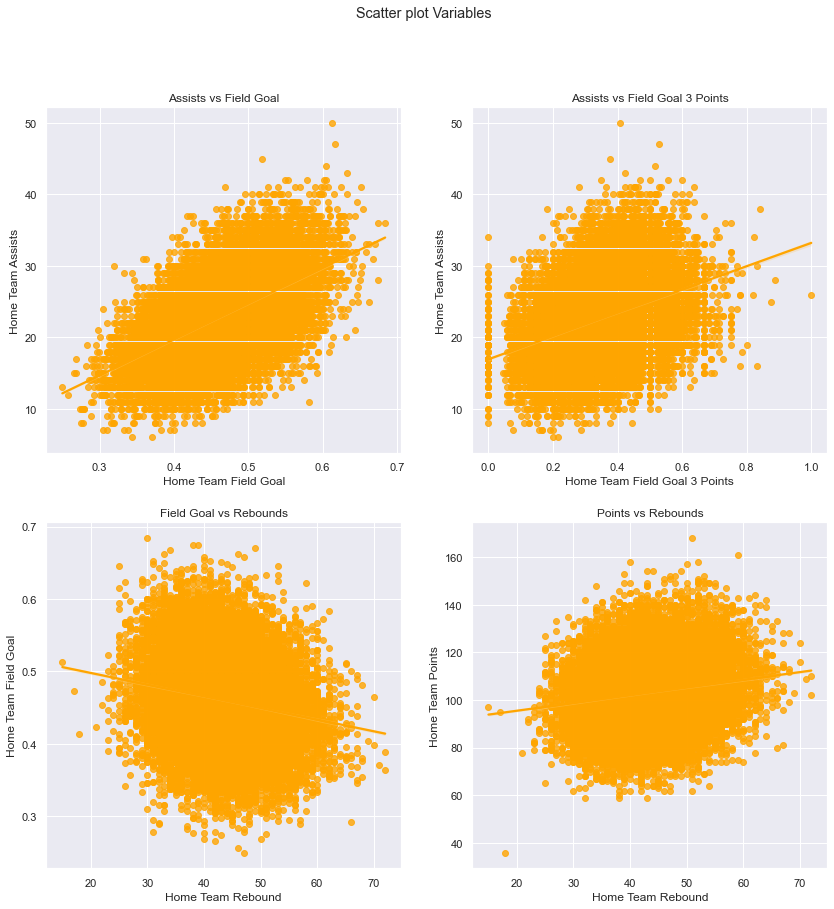

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
 
fig.suptitle('Scatter plot Variables')
  
sns.regplot(ax=axes[0, 0], data=data, x='FG_PCT_home', y='AST_home', color='orange').set(xlabel='Home Team Field Goal',
       ylabel='Home Team Assists', title='Assists vs Field Goal')
sns.regplot(ax=axes[0, 1], data=data, x='FG3_PCT_home', y='AST_home', color='orange').set(xlabel='Home Team Field Goal 3 Points',
       ylabel='Home Team Assists', title='Assists vs Field Goal 3 Points')
sns.regplot(ax=axes[1, 0], data=data, x='REB_home', y='FG_PCT_home', color='orange').set(xlabel='Home Team Rebound',
       ylabel='Home Team Field Goal', title='Field Goal vs Rebounds')
sns.regplot(ax=axes[1, 1], data=data, x='REB_home', y='PTS_home', color='orange').set(xlabel='Home Team Rebound',
       ylabel='Home Team Points', title='Points vs Rebounds')


[Text(0.5, 1.0, 'Frequency Distribution Home Team Field Goal')]

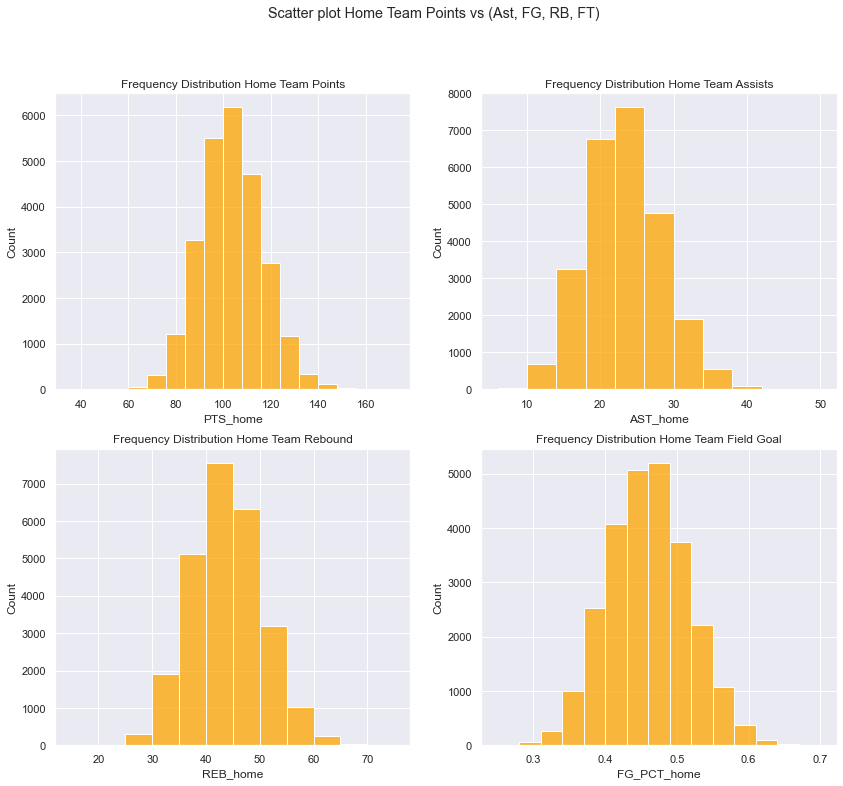

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
 
fig.suptitle('Scatter plot Home Team Points vs (Ast, FG, RB, FT)')
#fig.subplots_adjust(top=1)
  
sns.histplot(ax=axes[0, 0], data=data, x='PTS_home', color='orange', 
             binwidth=8).set(title='Frequency Distribution Home Team Points')
sns.histplot(ax=axes[0, 1], data=data, x='AST_home', color='orange', 
             binwidth=4).set(title='Frequency Distribution Home Team Assists')
sns.histplot(ax=axes[1, 0], data=data, x='REB_home', color='orange', 
             binwidth=5).set(title='Frequency Distribution Home Team Rebound')
sns.histplot(ax=axes[1, 1], data=data, x='FG_PCT_home', color='orange',
             binwidth=.03).set(title='Frequency Distribution Home Team Field Goal')

In [31]:
data_away = data[['PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away']]

In [32]:
corr2 = data_away.corr()
corr2

,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
PTS_away,1.000000,0.669054,0.201684,0.409656,0.591523,0.176835
FG_PCT_away,0.669054,1.000000,0.038309,0.435279,0.524138,-0.171026
FT_PCT_away,0.201684,0.038309,1.000000,0.031278,0.029563,-0.038057
FG3_PCT_away,0.409656,0.435279,0.031278,1.000000,0.320075,-0.094666
AST_away,0.591523,0.524138,0.029563,0.320075,1.000000,0.071461
REB_away,0.176835,-0.171026,-0.038057,-0.094666,0.071461,1.000000


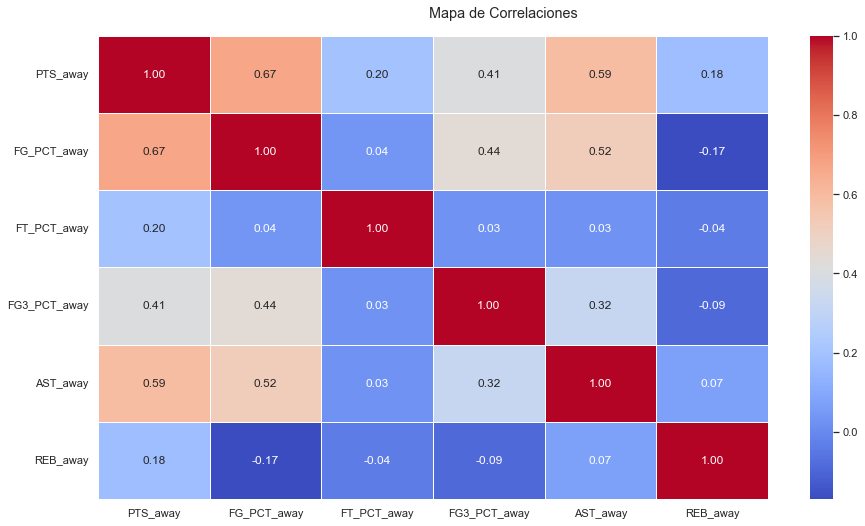

In [33]:
sns.set() #heatmap de las correlaciones con seaborn

fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(round(corr2, 2), annot=True, ax=ax, cmap='coolwarm',
            fmt='.2f', linewidths=0.5)
fig.subplots_adjust(top=0.93)
fig.suptitle('Mapa de Correlaciones');

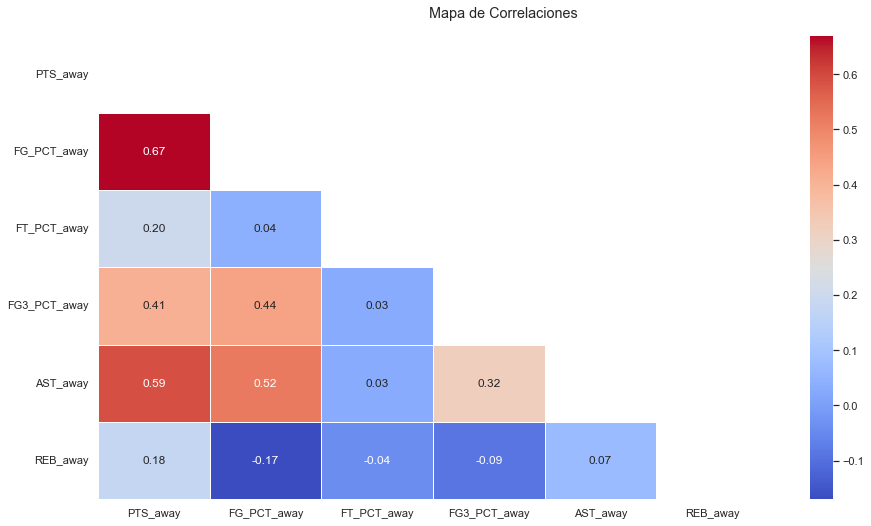

In [34]:
mask = np.zeros_like(corr2)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(15, 8))
    sns.heatmap(round(corr2, 2), annot=True, ax=ax, cmap='coolwarm',
                fmt='.2f', linewidths=0.5, mask=mask)
    fig.subplots_adjust(top=0.93)
    fig.suptitle('Mapa de Correlaciones')

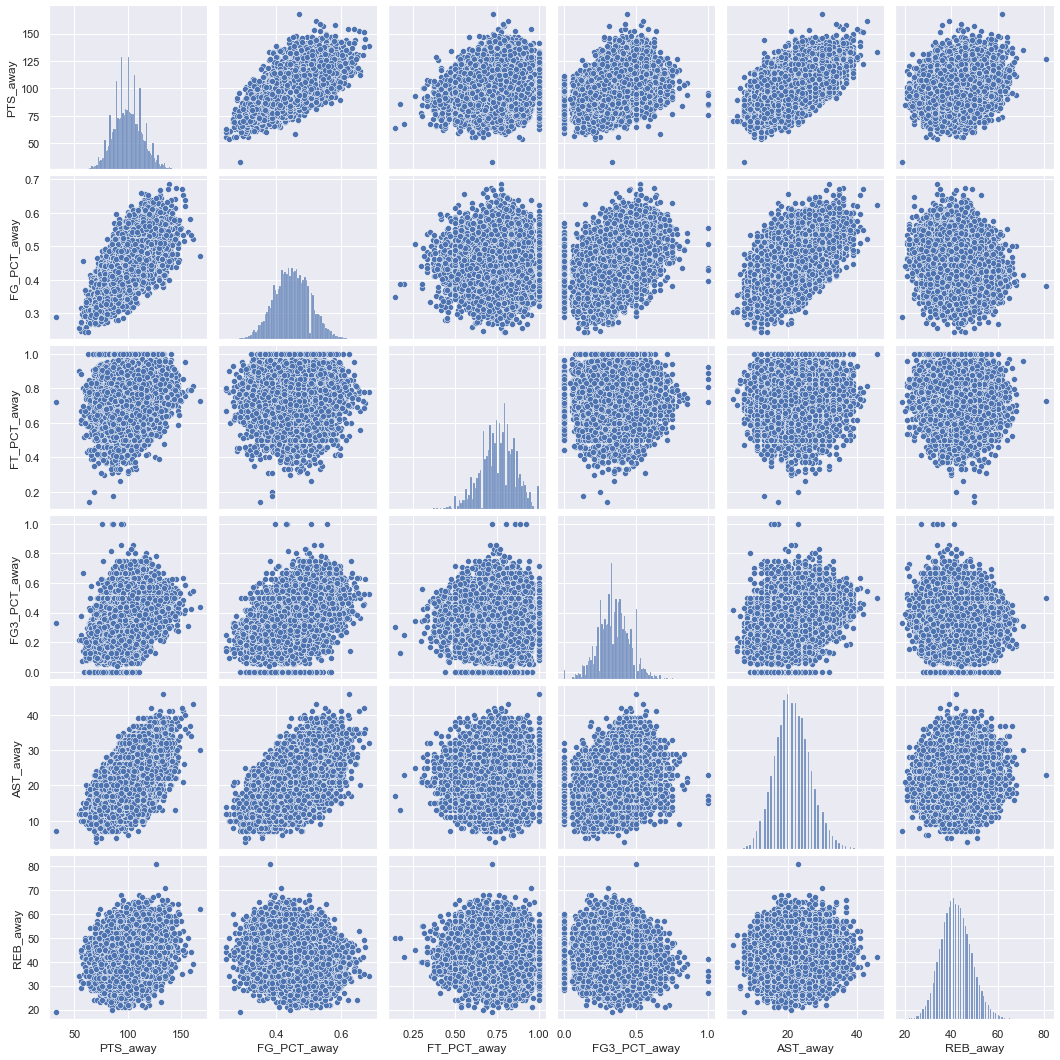

In [35]:
sns.pairplot(data_away);

[Text(0.5, 0, 'away Team Field Goal 3 Points'),
 Text(0, 0.5, 'away Team Points')]

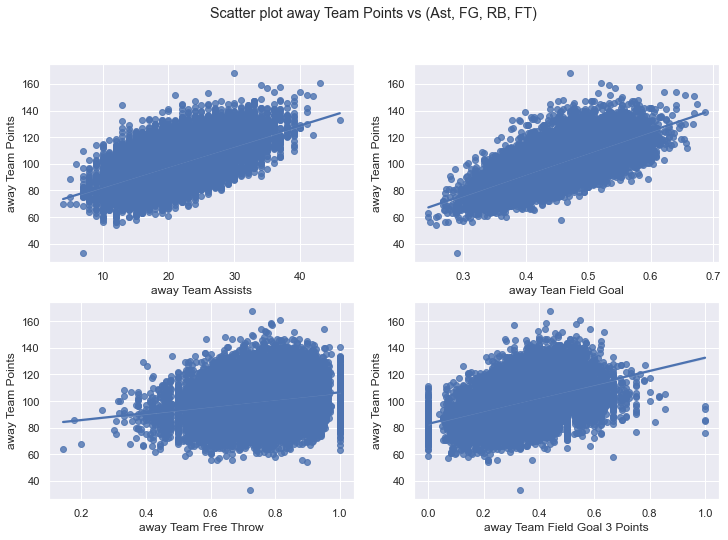

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
 
fig.suptitle('Scatter plot away Team Points vs (Ast, FG, RB, FT)')
  
sns.regplot(ax=axes[0, 0], data=data, x='AST_away', y='PTS_away', color='b').set(xlabel='away Team Assists',
       ylabel='away Team Points')
sns.regplot(ax=axes[0, 1], data=data, x='FG_PCT_away', y='PTS_away', color='b').set(xlabel='away Tean Field Goal',
       ylabel='away Team Points')
sns.regplot(ax=axes[1, 0], data=data, x='FT_PCT_away', y='PTS_away', color='b').set(xlabel='away Team Free Throw',
       ylabel='away Team Points')
sns.regplot(ax=axes[1, 1], data=data, x='FG3_PCT_away', y='PTS_away', color='b').set(xlabel='away Team Field Goal 3 Points',
       ylabel='away Team Points')

[Text(0.5, 0, 'away Team Rebound'),
 Text(0, 0.5, 'away Team Points'),
 Text(0.5, 1.0, 'Points vs Rebounds')]

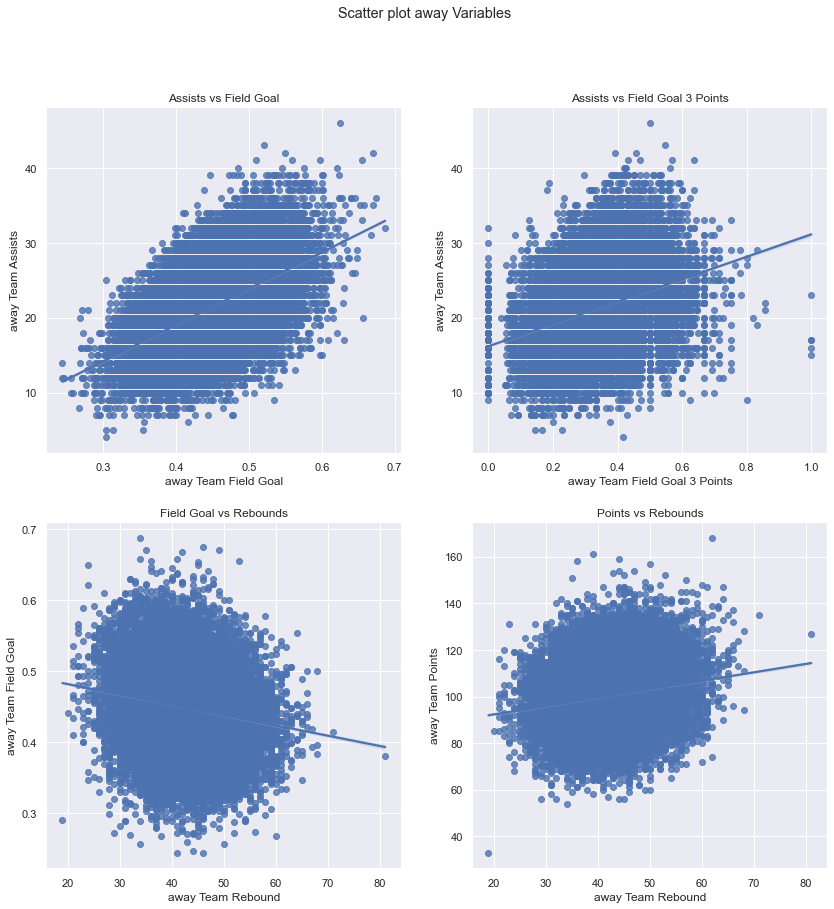

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
 
fig.suptitle('Scatter plot away Variables')
  
sns.regplot(ax=axes[0, 0], data=data, x='FG_PCT_away', y='AST_away', color='b').set(xlabel='away Team Field Goal',
       ylabel='away Team Assists', title='Assists vs Field Goal')
sns.regplot(ax=axes[0, 1], data=data, x='FG3_PCT_away', y='AST_away', color='b').set(xlabel='away Team Field Goal 3 Points',
       ylabel='away Team Assists', title='Assists vs Field Goal 3 Points')
sns.regplot(ax=axes[1, 0], data=data, x='REB_away', y='FG_PCT_away', color='b').set(xlabel='away Team Rebound',
       ylabel='away Team Field Goal', title='Field Goal vs Rebounds')
sns.regplot(ax=axes[1, 1], data=data, x='REB_away', y='PTS_away', color='b').set(xlabel='away Team Rebound',
       ylabel='away Team Points', title='Points vs Rebounds')


[Text(0.5, 1.0, 'Frequency Distribution away Team Field Goal')]

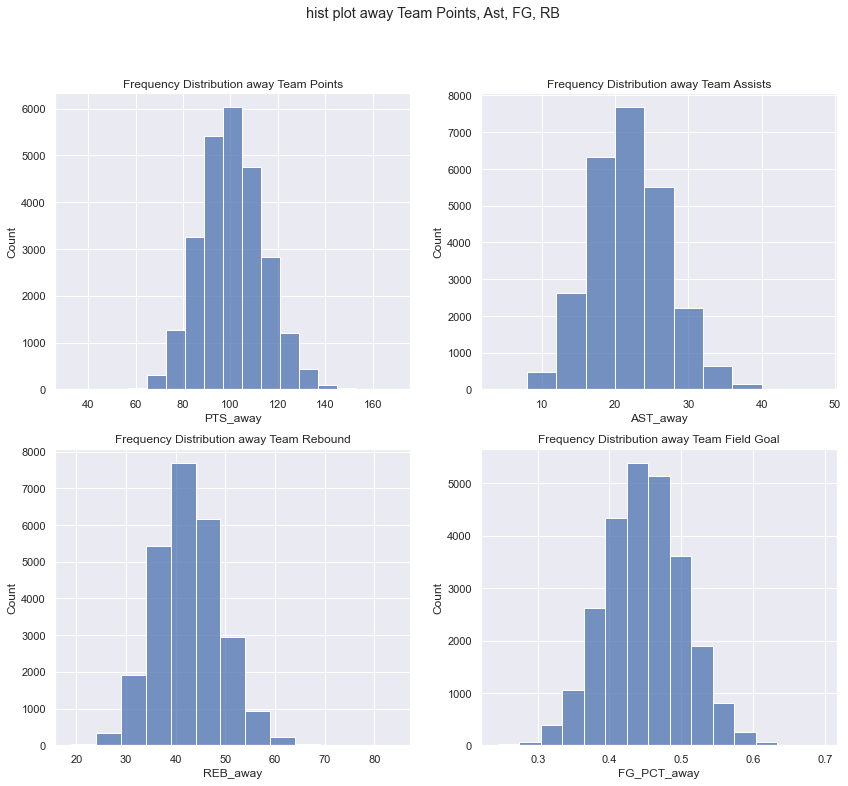

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
 
fig.suptitle('hist plot away Team Points, Ast, FG, RB')
#fig.subplots_adjust(top=1)
  
sns.histplot(ax=axes[0, 0], data=data, x='PTS_away', color='b', 
             binwidth=8).set(title='Frequency Distribution away Team Points')
sns.histplot(ax=axes[0, 1], data=data, x='AST_away', color='b', 
             binwidth=4).set(title='Frequency Distribution away Team Assists')
sns.histplot(ax=axes[1, 0], data=data, x='REB_away', color='b', 
             binwidth=5).set(title='Frequency Distribution away Team Rebound')
sns.histplot(ax=axes[1, 1], data=data, x='FG_PCT_away', color='b',
             binwidth=.03).set(title='Frequency Distribution away Team Field Goal')

In [39]:
#analizamos comportamientos generales y especificos

In [40]:
pts_year = data.groupby('year')['pts_totals'].mean()

<AxesSubplot:title={'center':'Average Points from 2003 to 2022'}, xlabel='Years', ylabel='Average'>

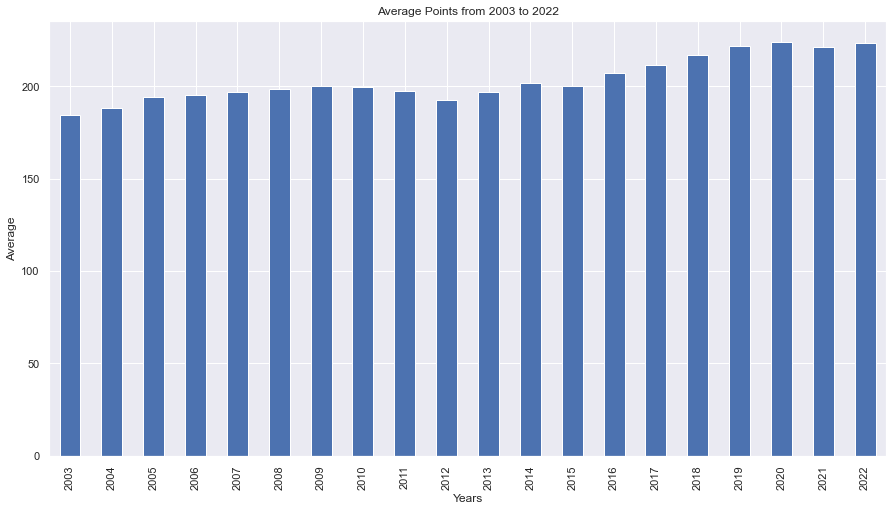

In [41]:
pts_year.plot(kind='bar', title='Average Points from 2003 to 2022', color='b',
               ylabel='Average', xlabel='Years', figsize=(15, 8))

In [42]:
win_loss_home = data.groupby('HOME_TEAM_WINS')['pts_totals', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 
                                          'AST_home', 'REB_home'].mean()

In [43]:
win_loss_home

,pts_totals,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home
HOME_TEAM_WINS,,,,,,,
0,203.746063,96.804971,0.430871,0.748512,0.315525,20.850313,41.389869
1,203.159551,107.489145,0.480793,0.767491,0.383979,24.049027,44.706368


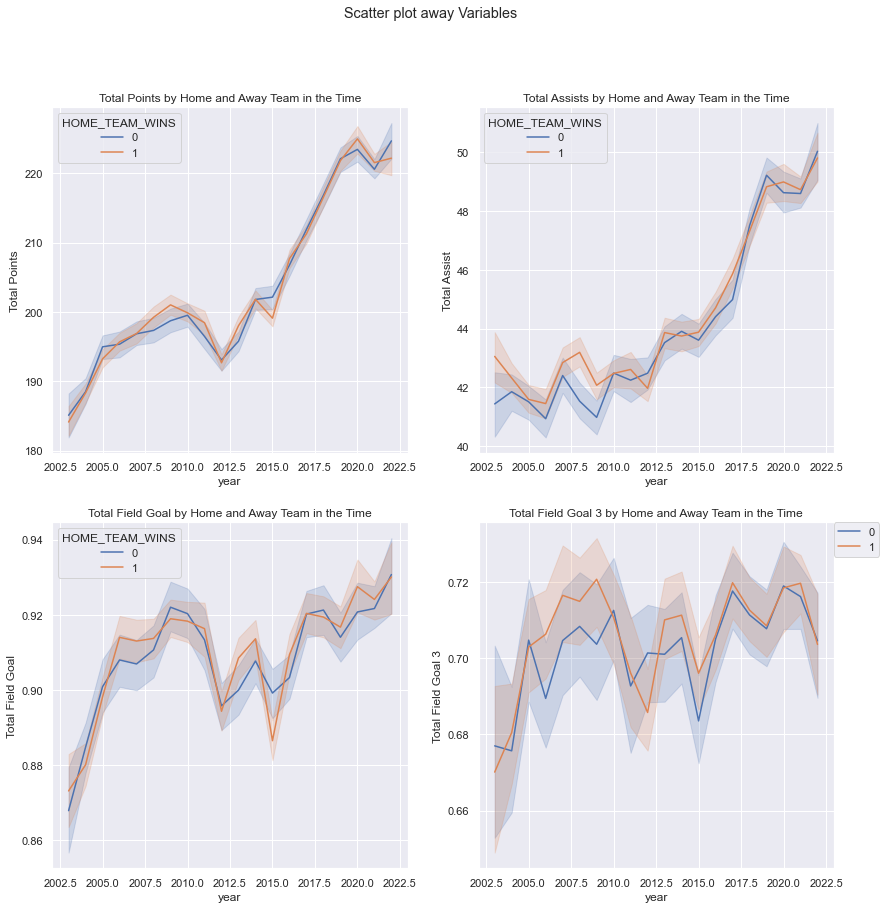

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
 
fig.suptitle('Scatter plot away Variables')
  
sns.lineplot(ax=axes[0, 0], data=data, x='year', y='pts_totals', hue="HOME_TEAM_WINS").set(ylabel='Total Points', title='Total Points by Home and Away Team in the Time')
sns.lineplot(ax=axes[0, 1], data=data, x='year', y='ast_totals', hue="HOME_TEAM_WINS").set(ylabel='Total Assist', title='Total Assists by Home and Away Team in the Time')
sns.lineplot(ax=axes[1, 0], data=data, x='year', y='fg_totals', hue="HOME_TEAM_WINS").set(ylabel='Total Field Goal', title='Total Field Goal by Home and Away Team in the Time')
sns.lineplot(ax=axes[1, 1], data=data, x='year', y='fg3_totals', hue="HOME_TEAM_WINS").set(ylabel='Total Field Goal 3', title='Total Field Goal 3 by Home and Away Team in the Time')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)

(array([2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5, 2015. , 2017.5,
        2020. , 2022.5, 2025. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

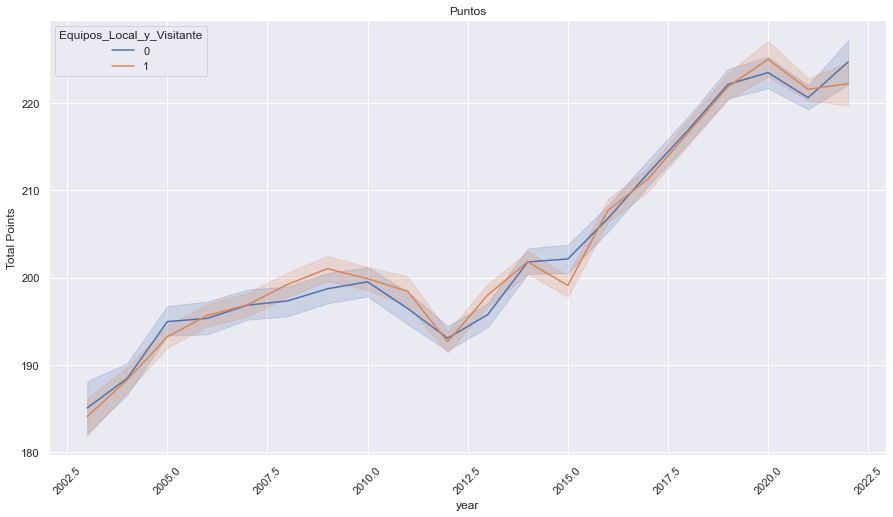

In [66]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=data, x='year', y='pts_totals', hue="Equipos_Local_y_Visitante")
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(ylabel='Total Points', title='Puntos')
plt.xticks(rotation=45)

(array([2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5, 2015. , 2017.5,
        2020. , 2022.5, 2025. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

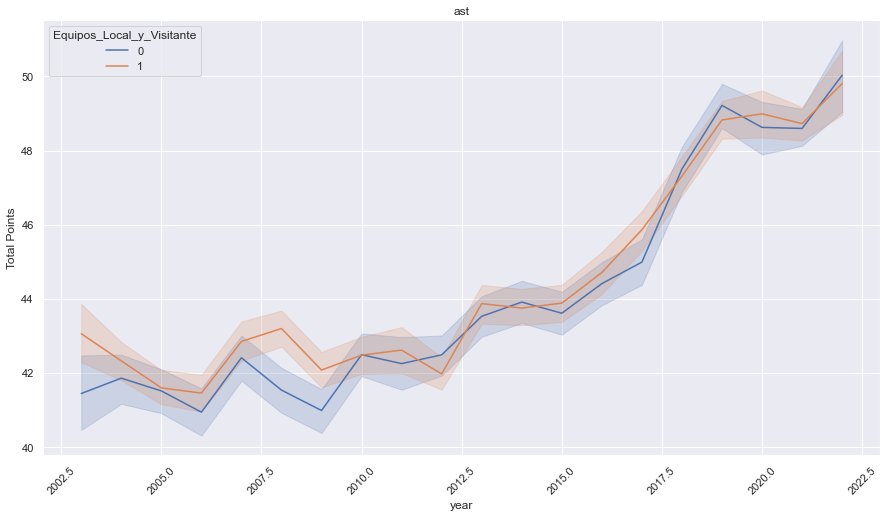

In [68]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=data, x='year', y='ast_totals', hue="Equipos_Local_y_Visitante")
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(ylabel='Total Points', title='ast')
plt.xticks(rotation=45)

(array([2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5, 2015. , 2017.5,
        2020. , 2022.5, 2025. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

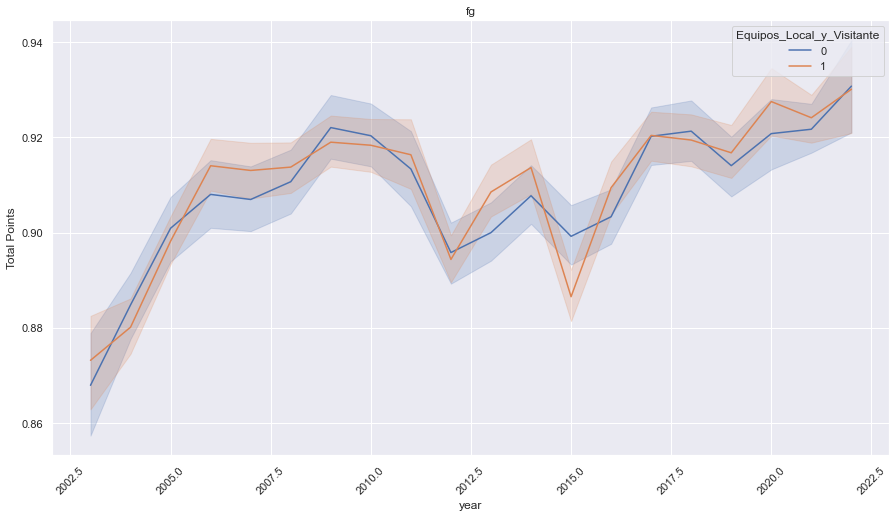

In [72]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=data, x='year', y='fg_totals', hue="Equipos_Local_y_Visitante")
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(ylabel='Total Points', title='fg')
plt.xticks(rotation=45)

(array([2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5, 2015. , 2017.5,
        2020. , 2022.5, 2025. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

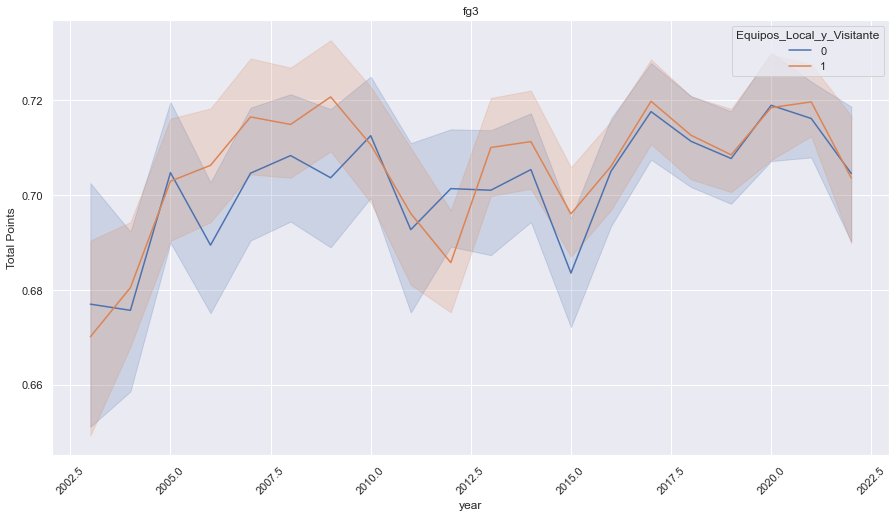

In [70]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=data, x='year', y='fg3_totals', hue="Equipos_Local_y_Visitante")
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(ylabel='Total Points', title='fg3')
plt.xticks(rotation=45)

In [47]:
win_loss_away = data.groupby('HOME_TEAM_WINS')['pts_totals', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 
                                          'AST_away', 'REB_away'].mean()

In [48]:
win_loss_away

,pts_totals,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
HOME_TEAM_WINS,,,,,,,
0,203.746063,106.941093,0.478334,0.771339,0.387780,23.222064,44.070290
1,203.159551,95.670406,0.429045,0.748860,0.322725,20.139162,40.704256


<AxesSubplot:xlabel='HOME_TEAM_WINS', ylabel='Count'>

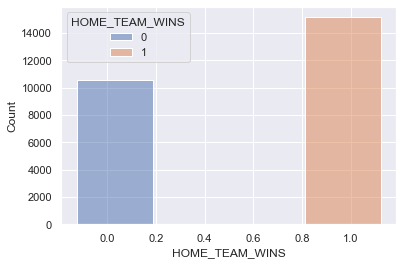

In [49]:
sns.histplot(data=data, x="HOME_TEAM_WINS", hue="HOME_TEAM_WINS", shrink=5)
#se aprecia que los equipos de la casa 15,155 tienen mas victorias totales que los visitantes 10,641

In [50]:
win_loss = data.groupby('year')['HOME_TEAM_WINS'].sum()

In [51]:
win_loss

year
2003    292
2004    794
2005    847
2006    898
2007    821
2008    865
2009    896
2010    858
2011    559
2012    952
2013    841
2014    820
2015    846
2016    834
2017    824
2018    824
2019    753
2020    425
2021    938
2022    268
Name: HOME_TEAM_WINS, dtype: int64

In [52]:
win_loss.to_frame()


,HOME_TEAM_WINS
year,
2003,292
2004,794
2005,847
2006,898
2007,821
2008,865
2009,896
2010,858
2011,559


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 0 to 25795
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   GAME_DATE_EST     25697 non-null  datetime64[ns]
 1   GAME_ID           25697 non-null  int64         
 2   GAME_STATUS_TEXT  25697 non-null  object        
 3   HOME_TEAM_ID      25697 non-null  int64         
 4   VISITOR_TEAM_ID   25697 non-null  int64         
 5   SEASON            25697 non-null  int64         
 6   TEAM_ID_home      25697 non-null  int64         
 7   PTS_home          25697 non-null  float64       
 8   FG_PCT_home       25697 non-null  float64       
 9   FT_PCT_home       25697 non-null  float64       
 10  FG3_PCT_home      25697 non-null  float64       
 11  AST_home          25697 non-null  float64       
 12  REB_home          25697 non-null  float64       
 13  TEAM_ID_away      25697 non-null  int64         
 14  PTS_away          2569

In [ ]:
#SELECCION DE VARIABLES PARA EL MODELO

In [59]:
#MODELOS DE REGRESION LINEAL PARA VER EL IMPACTO DE LAS VARIABLES OFENSIVAS EN EL PUNTAJE DE LOS EQUIPOS
data_models = data[['pts_totals', 'ast_totals', 'fg_totals', 'rb_totals', 'fg3_totals', 'ft_totals']]

In [60]:
data_models 

,pts_totals,ast_totals,fg_totals,rb_totals,fg3_totals,ft_totals
0,217.0,44.0,0.820,99.0,0.690,1.635
1,192.0,39.0,0.862,86.0,0.637,1.757
2,227.0,51.0,0.901,99.0,0.713,1.813
3,231.0,60.0,0.897,94.0,0.786,1.629
4,242.0,60.0,1.022,89.0,0.794,1.510
...,...,...,...,...,...,...
25791,180.0,41.0,0.785,93.0,0.796,1.464
25792,166.0,35.0,0.749,87.0,0.648,1.355
25793,193.0,48.0,0.835,88.0,1.000,1.341
25794,193.0,39.0,0.909,75.0,0.718,1.496


In [86]:
X = data_models.drop('pts_totals', axis=1)
y = data_models['pts_totals']

In [87]:
#estandarizamos las variables para tenerlas en mejor medidas
scaler = StandardScaler()
dt = scaler.fit_transform(X)

In [88]:
dt

array([[-0.01804041, -1.1076027 ,  1.41186002, -0.09756416,  0.79751765],
       [-0.65923608, -0.58828623,  0.05921014, -0.43532111,  1.62760482],
       [ 0.87963352, -0.10606379,  1.41186002,  0.04900962,  2.00862844],
       ...,
       [ 0.49491612, -0.92213253,  0.26731012,  1.87799537, -1.20285634],
       [-0.65923608, -0.00714637, -1.08533976,  0.08087348, -0.1482374 ],
       [-0.91571435, -0.20498121, -0.14888984,  0.41863043, -0.90348064]])

In [89]:
df = pd.DataFrame(dt, index=X.index, columns=X.columns)
df.head()

,ast_totals,fg_totals,rb_totals,fg3_totals,ft_totals
0,-0.018040,-1.107603,1.41186,-0.097564,0.797518
1,-0.659236,-0.588286,0.05921,-0.435321,1.627605
2,0.879634,-0.106064,1.41186,0.049010,2.008628
3,2.033786,-0.155523,0.89161,0.514222,0.756694
4,2.033786,1.390062,0.37136,0.565204,-0.052981


In [90]:
X = df

In [91]:
X

,ast_totals,fg_totals,rb_totals,fg3_totals,ft_totals
0,-0.018040,-1.107603,1.41186,-0.097564,0.797518
1,-0.659236,-0.588286,0.05921,-0.435321,1.627605
2,0.879634,-0.106064,1.41186,0.049010,2.008628
3,2.033786,-0.155523,0.89161,0.514222,0.756694
4,2.033786,1.390062,0.37136,0.565204,-0.052981
...,...,...,...,...,...
25791,-0.402758,-1.540366,0.78756,0.577950,-0.365965
25792,-1.172193,-1.985495,0.16326,-0.365221,-1.107600
25793,0.494916,-0.922133,0.26731,1.877995,-1.202856
25794,-0.659236,-0.007146,-1.08534,0.080873,-0.148237


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=False)

In [93]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [94]:
intercept = model.intercept_
intercept

203.39905603861092

In [95]:
coef = model.coef_
coef

array([ 2.99110611, 20.6833309 , 14.92142899,  2.60914659,  5.57886327])

In [96]:
y_ = intercept + coef[0]*(X.iloc[:, 0].values) + coef[1]*(X.iloc[:, 1].values) 
y_

array([180.43618209, 189.25949224, 203.83638077, ..., 185.80663038,
       201.2794003 , 196.42036299])

In [97]:
beta_x = [coef[i]*(X.iloc[:, i].values) for i in range(4)]
beta_x

[array([-0.05396079, -1.97184507,  2.63107721, ...,  1.48034664,
        -1.97184507, -2.73899878]),
 array([-22.90891316, -12.16771873,  -2.19375247, ..., -19.07277229,
         -0.14781068,  -4.23969427]),
 array([ 21.06696907,   0.88349993,  21.06696907, ...,   3.98864903,
        -16.19482012,  -2.22164917]),
 array([-0.25455919, -1.13581659,  0.12787327, ...,  4.89996523,
         0.21101076,  1.09226816])]

In [98]:
df_betas = pd.DataFrame(beta_x)

In [99]:
df_betas['y'] = df_betas.sum(axis=0) + intercept

In [100]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [101]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.7596316097418822, 0.7545386458327634)

In [102]:
mean_squared_error(y_test_predict, y_test)

122.62583442734044

In [103]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [104]:
mape(y_test, y_test_predict)

4.312367181578769

In [105]:
df_y = pd.DataFrame(zip(y_train.values.flatten(), y_train_predict.flatten()),
                    columns=['y_observada', 'y_predicha'])
df_y.head(10)

,y_observada,y_predicha
0,229.0,233.093553
1,230.0,215.811476
2,213.0,211.470695
3,253.0,243.234841
4,225.0,226.293787
5,166.0,168.926452
6,192.0,191.692642
7,167.0,185.125347
8,191.0,196.712781
9,200.0,191.875207


In [106]:
df_y['error'] = df_y['y_observada'] - df_y['y_predicha']
df_y.head()

,y_observada,y_predicha,error
0,229.0,233.093553,-4.093553
1,230.0,215.811476,14.188524
2,213.0,211.470695,1.529305
3,253.0,243.234841,9.765159
4,225.0,226.293787,-1.293787


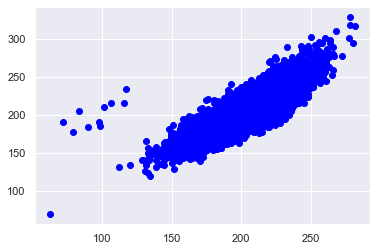

In [107]:
sns.set()
plt.scatter(y_train_predict, y_train, c='blue'); #las predicciones se comportan bien con relacion a las observadas

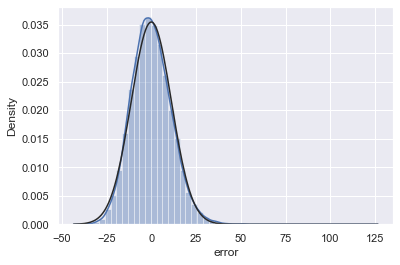

In [108]:
sns.distplot(df_y['error'], fit=norm);

In [109]:
X = sm.add_constant(X_train)

y = y_train

In [110]:
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:             pts_totals   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                 1.299e+04
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        15:11:40   Log-Likelihood:                -78931.
No. Observations:               20557   AIC:                         1.579e+05
Df Residuals:                   20551   BIC:                         1.579e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        203.3991      0.079   2590.939      0.0

In [111]:
data.to_csv('data_nba_clean.csv')